In [152]:
# run1

import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
    
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.stats import norm
from scipy import io
import builtins
from save_csv import results_to_csv

In [21]:
# 3.1

mu = [1, 1]
covar = [[1, 0], [0, 2]]
       
f = multivariate_normal(mu, covar)

x, y = np.mgrid[-2:3:.05, -2:5:.05]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

Z = f.pdf(pos)

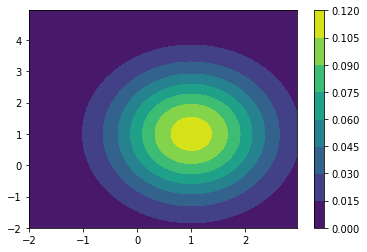

In [22]:
plt.contourf(x, y, Z)
plt.colorbar()

In [13]:
# 3.2

mu = [-1, 2]
covar = [[2, 1], [1, 4]]
       
f = multivariate_normal(mu, covar)

x, y = np.mgrid[-4:2:.05, -3:5:.05]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

Z = f.pdf(pos)

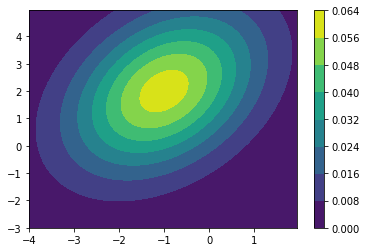

In [14]:
plt.contourf(x,y,Z)
plt.colorbar()

In [40]:
# 3.3

mu_1 = [0, 2]
mu_2 = [2, 0]
covar = [[2, 1], [1, 1]]
       
f_1 = multivariate_normal(mu_1, covar)
f_2 = multivariate_normal(mu_2, covar)

x, y = np.mgrid[-3:5:.01, -2:4:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

Z_1 = f_1.pdf(pos)
Z_2 = f_2.pdf(pos)

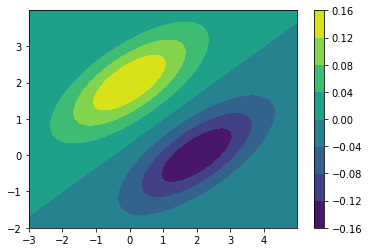

In [41]:
plt.contourf(x,y,Z_1-Z_2)
plt.colorbar()

In [51]:
# 3.4

mu_1 = [0, 2]
mu_2 = [2, 0]
covar_1 = [[2, 1], [1, 1]]
covar_2 = [[2, 1], [1, 4]]
       
f_1 = multivariate_normal(mu_1, covar_1)
f_2 = multivariate_normal(mu_2, covar_2)

x, y = np.mgrid[-3:5:.01, -2:4:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

Z_1 = f_1.pdf(pos)
Z_2 = f_2.pdf(pos)

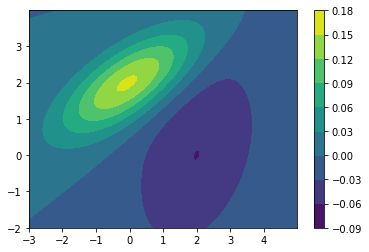

In [52]:
plt.contourf(x,y,Z_1-Z_2)
plt.colorbar()

In [59]:
# 3.5

mu_1 = [1, 1]
mu_2 = [-1, -1]
covar_1 = [[2, 0], [0, 1]]
covar_2 = [[2, 1], [1, 2]]
       
f_1 = multivariate_normal(mu_1, covar_1)
f_2 = multivariate_normal(mu_2, covar_2)

x, y = np.mgrid[-4:4:.01, -4:3:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

Z_1 = f_1.pdf(pos)
Z_2 = f_2.pdf(pos)

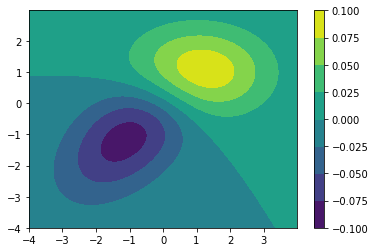

In [60]:
plt.contourf(x,y,Z_1-Z_2)
plt.colorbar()

In [73]:
# 4

# scipy.norm takes in the standard deviation
# which is why I use 3 and not 9
#                and 2 and not 4
X_1 = norm(3, 3)
f = norm(4, 2)

# Set the seed = 69420
np.random.seed(69420)

first = X_1.rvs(size=100)
second = 0.5 * first + f.rvs(size=100)

In [74]:
# 4(a)

mu_first = sum(first) / 100
mu_second = sum(second) / 100

print("mean:", [mu_first, mu_second])

mean: [2.3814471046127164, 4.914381325492262]


In [75]:
# 4(b)

cov = np.cov([first, second])

print("cov:", cov)

cov: [[7.80348935 3.82809868]
 [3.82809868 5.09099627]]


In [76]:
# 4(c)

eigen = np.linalg.eig(cov)

eigen_val = eigen[0]
eigen_vec = eigen[1]

print("eigenvalues:", eigen_val)
print("eigenvectors:", eigen_vec)

eigenvalues: [10.5084919   2.38599372]
eigenvectors: [[ 0.8166848  -0.57708399]
 [ 0.57708399  0.8166848 ]]


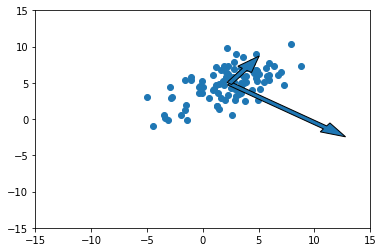

In [95]:
# 4(d)

v_1 = [eigen_val[0] * x for x in eigen_vec[0]]
v_2 = [eigen_val[1] * x for x in eigen_vec[1]]

plt.xlim(-15,15)
plt.ylim(-15,15)
plt.scatter(first, second)
plt.arrow(mu_first, mu_second, v_1[0], v_1[1], width=0.5)
plt.arrow(mu_first, mu_second, v_2[0], v_2[1], width=0.5)

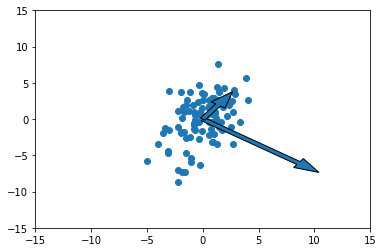

In [125]:
# 4(e)

U_1 = [eigen_vec[0], eigen_vec[1]]

shifted_1 = [x - mu_first for x in first]
shifted_2 = [x - mu_second for x in second]


rotated = [np.matmul(U_1, [shifted_1, shifted_2])]

first_new = [x for x in rotated[0][0]]
second_new = [x for x in rotated[0][1]]

plt.xlim(-15,15)
plt.ylim(-15,15)
plt.scatter(first_new, second_new)
plt.arrow(0, 0, v_1[0], v_1[1], width=0.5)
plt.arrow(0, 0, v_2[0], v_2[1], width=0.5)

In [2]:
# 8

# run2
for data_name in ["mnist", "spam"]:
    data = io.loadmat("data/%s_data.mat" % data_name)
    print("\nloaded %s data!" % data_name)
    fields = "test_data", "training_data", "training_labels"
    for field in fields:
        print(field, data[field].shape)

# Separate mnist data
data = io.loadmat("data/mnist_data.mat")
mnist = data["training_data"]
mnist = np.concatenate((mnist, data["training_labels"]), axis=1)
np.random.seed(69420)
np.random.shuffle(mnist)

mnist_train_s = mnist[:, :-1]
mnist_train_l = mnist[:, -1:]f
N_mnist_train = 60000
N_mnist_features = 784

print("\nmnist_training_data:", mnist_train_s.shape)
print("mnist_training_labels:", mnist_train_l.shape)


loaded mnist data!
test_data (10000, 784)
training_data (60000, 784)
training_labels (60000, 1)

loaded spam data!
test_data (5857, 32)
training_data (5172, 32)
training_labels (5172, 1)

mnist_training_data: (60000, 784)
mnist_training_labels: (60000, 1)
spam_training_data: (5172, 32)
spam_training_labels: (5172, 1)


In [3]:
# 8.1

# run3
# Normalize mnist
l_2 = [np.linalg.norm(x) for x in mnist_train_s]
normalized = []
for i in range(0, len(mnist_train_s)):
    x = mnist_train_s[i]
    if l_2[i] != 0:
        x = [y / l_2[i] for y in x]
    normalized.append(x)
    
mnist_train_s = normalized

print(np.linalg.norm(mnist_train_s[0]))
print(np.linalg.norm(mnist_train_s[1]))

1.0
1.0


In [57]:
# MLE for mnist

mu_mnist = []
n_c = [0,0,0,0,0,0,0,0,0,0]

for dig in range(0, 10):
    mu_c = np.zeros(len(mnist_train_s[0]))
    indexes_c = []
    for i in range(0, len(mnist_train_s)):
        if (mnist_train_l[i] == dig):
            n_c[dig] += 1
            indexes_c.append(i)
            
    for i in indexes_c:
        mu_c = np.add(mu_c, mnist_train_s[i])
    mu_mnist.append([x / n_c[dig] for x in mu_c])

In [247]:
cov_mnist = []

for dig in range(0, 10):
    print("dig:", dig)
    sum_c = np.zeros((len(mnist_train_s[0]), len(mnist_train_s[0])))
    for i in range(0, len(mnist_train_s)):
        if (mnist_train_l[i] == dig):
            X_i = np.array(mnist_train_s[i])
            outer = np.outer(X_i - mu_mnist[dig], X_i - mu_mnist[dig])
            sum_c = np.add(sum_c, outer)
    sum_c = [x / n_c[dig] for x in sum_c]
    cov_mnist.append(sum_c)

dig: 0
dig: 1
dig: 2
dig: 3
dig: 4
dig: 5
dig: 6
dig: 7
dig: 8
dig: 9


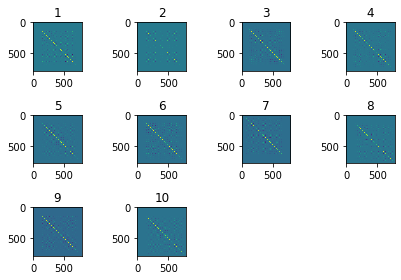

In [69]:
# 8.2

i = 1
for dig in range(0,10):
    plt.subplot(3,4,i)
    plt.imshow(cov_mnist[dig])
    plt.title(i)
    plt.tight_layout()
    i += 1

In [230]:
# 8.3(a)

# run4
class LDA:

    def __init__(self, train, label):
        self.train = train
        self.label = label
        self.N_features = len(self.train[0])
        self.predicted = []
        
        self.n_c = [0,0,0,0,0,0,0,0,0,0]
        for dig in range(0,10):
            self.n_c[dig] = self.get_n_c(dig)
        
        self.mu = np.zeros((10, self.N_features))
        for dig in range(0,10):
            mu_c = self.get_mu_c(dig)
            self.mu[dig] = mu_c
        
        #self.cov = np.zeros((self.N_features, self.N_features))
        #for dig in range(0, 10):
        #    cov_c = self.get_cov_c(dig)
        #    cov_c = [x / len(self.train) for x in cov_c]
        #    self.cov = np.add(self.cov, cov_c)
        
        self.cov = np.transpose(np.cov(np.transpose(train)))
        self.make_invertible(self.cov)

        
    def get_mu_c(self, dig):
        sum_c = np.zeros(self.N_features)
        for i in range(0, len(self.train)):
            if self.label[i][0] == dig:
                sum_c = np.add(sum_c, self.train[i])
        return [x / self.n_c[dig] for x in sum_c]
    
    def get_cov_c(self, dig):
        sum_c = np.zeros((self.N_features, self.N_features))
        for i in range(0, len(self.train)):
            if (self.label[i][0] == dig):
                X_i = np.array(self.train[i])
                outer = np.outer(X_i - self.mu[dig], X_i - self.mu[dig])
                sum_c = np.add(sum_c, outer)
        return sum_c
    
    def train(self):
        return self.train
    
    def label(self):
        return self.label
    
    def mean(self):
        return self.mu
    
    def covariance(self):
        return self.cov
    
    def nc(self, dig):
        return self.n_c[dig]
    
    def get_n_c(self, dig):
        n = 0
        for i in range(0, len(self.train)):
            if (self.label[i][0] == dig):
                n += 1
        return n
    
    def prior(self, dig):
        return self.n_c[dig] / len(self.train)
    
    def make_invertible(self, cov):
        for i in range(len(cov)):
            for j in range(len(cov[0])):
                cov[i][j] = round(cov[i][j], 20)
        
        for i in range(len(cov)):
            cov[i][i] = cov[i][i] + 1e-25

    def predict(self, dig, X, inv_prod, inv):
        mu_c = self.mu[dig]
        first_term = np.matmul(mu_c, np.transpose(inv_prod))
        second_term = np.matmul(mu_c, np.matmul(inv, np.transpose(mu_c)))
        third_term = np.log(self.prior(dig))
        
        return np.add(first_term, (-0.5 * second_term + third_term))
    
    def choose(self, X, labels, err_or_pred):
        inv = np.linalg.inv(self.cov)
        inv_prod = np.matmul(X, inv)
        lin_disc_vals = [self.predict(dig, X, inv_prod, inv) for dig in range(0, 10)]
        
        print("Done predicting on all sample points!")
        errors = [0,0,0,0,0,0,0,0,0,0]
        digits = []
        for j in range(len(lin_disc_vals[0])):
            max_val = lin_disc_vals[0][j]
            max_dig = 0
            for dig in range(1, 10):
                if lin_disc_vals[dig][j] > max_val:
                    max_val = lin_disc_vals[dig][j]
                    max_dig = dig
            digits.append(max_dig)
            if err_or_pred != "pred" and max_dig != labels[j][0]:
                errors[labels[j][0]] = errors[labels[j][0]] + 1
            
        self.predicted = errors
        if err_or_pred == "pred":
            return digits
    
    def pred(self, points):
        return self.choose(points, [], "pred")
    
    def digit_error(self, points, labels, recalc):
        if recalc:
            self.choose(points, labels, "")          
        return [self.predicted[dig] / self.n_c[dig] for dig in range(0,10)]
                           
    def total_error(self, points, labels, recalc):
        if recalc:
            self.choose(points, labels, "")
        return builtins.sum(self.predicted) / len(points)

In [252]:
mnist_val_s = mnist_train_s[:10000]
mnist_val_l = mnist_train_l[:10000]

LDA_errors_val = []
LDA_errors_train = []
LDA_dig_err_val = []

for n in [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]:
    print("Training on", n, "sample points")
    train_s = mnist_train_s[10000:10000+n]
    train_l = mnist_train_l[10000:10000+n]
    
    r = LDA(train_s, train_l)
    
    err = r.total_error(mnist_val_s, mnist_val_l, True)
    LDA_errors_val.append(err)
    
    err = r.digit_error(mnist_val_s, mnist_val_l, False)
    LDA_dig_err_val.append(err)
    
    err = r.total_error(train_s, train_l, True)
    LDA_errors_train.append(err)

Training on 100 sample points
Done predicting on all sample points!
Done predicting on all sample points!
Training on 200 sample points
Done predicting on all sample points!
Done predicting on all sample points!
Training on 500 sample points
Done predicting on all sample points!
Done predicting on all sample points!
Training on 1000 sample points
Done predicting on all sample points!
Done predicting on all sample points!
Training on 2000 sample points
Done predicting on all sample points!
Done predicting on all sample points!
Training on 5000 sample points
Done predicting on all sample points!
Done predicting on all sample points!
Training on 10000 sample points
Done predicting on all sample points!
Done predicting on all sample points!
Training on 30000 sample points
Done predicting on all sample points!
Done predicting on all sample points!
Training on 50000 sample points
Done predicting on all sample points!
Done predicting on all sample points!


Text(0.5, 0, 'amount of training data for mnist')

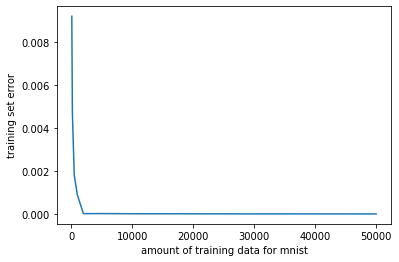

In [253]:
sizes = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]
plot_this = []
for i, e in enumerate(LDA_errors_train):
    plot_this.append(e / sizes[i])
plt.plot(sizes, plot_this)
plt.ylabel("training set error")
plt.xlabel("amount of training data for mnist")

Text(0.5, 0, 'amount of training data for mnist')

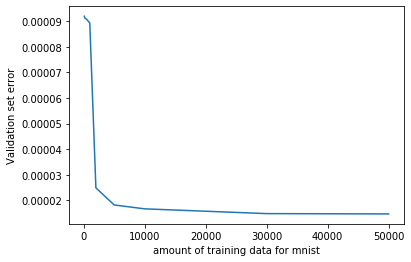

In [255]:
plot_this = []
for i, e in enumerate(LDA_errors_val):
    plot_this.append(e / 10000)
plt.plot(sizes, plot_this)
plt.ylabel("Validation set error")
plt.xlabel("amount of training data for mnist")

No handles with labels found to put in legend.


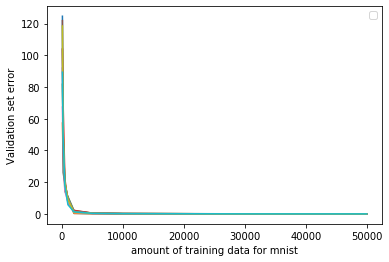

In [261]:
plt.plot(sizes, LDA_dig_err_val)
plt.ylabel("Error by digit")
plt.xlabel("amount of training data for mnist")
plt.legend()

In [239]:
# run5

class QDA:

    def __init__(self, train, label):
        self.train = train
        self.label = label
        self.N_features = len(self.train[0])
        self.predicted = []
        
        # Partition training points by class
        self.sample_c = [[],[],[],[],[],[],[],[],[],[]]
        for i in range(len(train)):
            self.sample_c[self.label[i][0]].append(self.train[i])
        
        # Calculate n_c values
        self.n_c = [0,0,0,0,0,0,0,0,0,0]
        for dig in range(0,10):
            self.n_c[dig] = len(self.sample_c[dig])
        
        # Calculate mu_c vectors
        self.mu = np.zeros((10, self.N_features))
        for dig in range(0,10):
            mu_c = self.get_mu_c(dig)
            self.mu[dig] = mu_c
        
        # Calculate cov_c matrices
        self.cov = []
        
        for dig in range(0,10):
            cov_c = self.get_cov_c(dig)
            print(cov_c.shape)
            self.make_invertible(cov_c)
            self.cov.append(cov_c)

        print("Finished training on sample points!")
        
    def get_mu_c(self, dig):
        sum_c = np.zeros(self.N_features)
        for i in range(len(self.sample_c[dig])):
            sum_c = np.add(sum_c, self.sample_c[dig][i])
        return [x / self.n_c[dig] for x in sum_c]
    
    def get_cov_c(self, dig):
        return np.cov(np.transpose(self.sample_c[dig]))
        
    def prior(self, dig):
        return self.n_c[dig] / len(self.train)
    
    def make_invertible(self, cov):
        for i in range(len(cov)):
            for j in range(len(cov[0])):
                cov[i][j] = round(cov[i][j], 8)
        
        for i in range(len(cov)):
            cov[i][i] = cov[i][i] + 1e-9

    def predict(self, dig, X):
        mu_c = self.mu[dig]
        cov_c = self.cov[dig]
        shifted = [np.subtract(row, mu_c) for row in X]
        
        inv = np.linalg.inv(cov_c)
        inv_prod = np.matmul(shifted, inv)
        
        first_term = np.array([np.matmul(shifted[i], inv_prod[i]) for i in range(len(shifted))])
        second_term = np.matmul(mu_c, np.matmul(inv, np.transpose(mu_c)))
        third_term = np.log(self.prior(dig))
        
        return np.add(np.add(-0.5 * first_term, -0.5 * np.linalg.slogdet(cov_c)[1]), np.log(self.prior(dig)))
    
    def choose(self, X, labels, err_or_pred):
        lin_disc_vals = [self.predict(dig, X) for dig in range(0, 10)]
        
        errors = [0,0,0,0,0,0,0,0,0,0]
        digits = []
        for j in range(len(lin_disc_vals[0])):
            max_val = lin_disc_vals[0][j]
            max_dig = 0
            for dig in range(1, 10):
                if lin_disc_vals[dig][j] > max_val:
                    max_val = lin_disc_vals[dig][j]
                    max_dig = dig
            digits.append(max_dig)
            if err_or_pred != "pred" and max_dig != labels[j][0]:
                errors[labels[j][0]] = errors[labels[j][0]] + 1
            
        self.predicted = errors
        if err_or_pred == "pred":
            return digits
        
    def pred(self, points):
        return self.choose(points, [], "pred")
    
    def digit_error(self, points, labels, recalc):
        if recalc:
            self.choose(points, labels, "")          
        return [self.predicted[dig] / self.n_c[dig] for dig in range(0,10)]
                           
    def total_error(self, points, labels, recalc):
        if recalc:
            self.choose(points, labels, "")
        return builtins.sum(self.predicted) / len(points)

In [263]:
mnist_val_s = mnist_train_s[:10000]
mnist_val_l = mnist_train_l[:10000]

QDA_errors_val_digit = []
QDA_errors_val_total = []
QDA_errors_train_digit = []
QDA_errors_train_total = []

for n in [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]:
    train_s = mnist_train_s[10000:10000+n]
    train_l = mnist_train_l[10000:10000+n]
    
    r = QDA(train_s, train_l)
    
    err = r.digit_error(mnist_val_s, mnist_val_l, True)
    QDA_errors_val_digit.append(err)
    err = r.total_error(mnist_val_s, mnist_val_l, False)
    QDA_errors_val_total.append(err)
    
    err = r.digit_error(train_s, train_l, True)
    QDA_errors_train_digit.append(err)
    err = r.total_error(train_s, train_l, False)
    QDA_errors_train_total.append(err)

Training on 100 sample points
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
Finished training on sample points!
Training on 200 sample points
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
Finished training on sample points!
Training on 500 sample points
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
Finished training on sample points!
Training on 1000 sample points
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
Finished training on sample points!
Training on 2000 sample points
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
Finished training on sample points!
Training on 5000 sample points
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)

Text(0.5, 0, 'amount of training data for mnist')

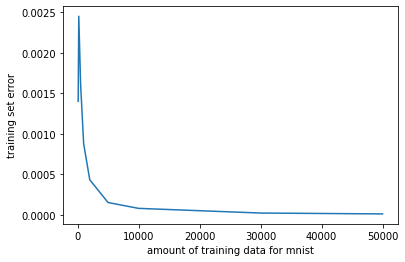

In [264]:
sizes = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]
plot_this = []
for i, e in enumerate(QDA_errors_train_total):
    plot_this.append(e / sizes[i])
plt.plot(sizes, plot_this)
plt.ylabel("training set error")
plt.xlabel("amount of training data for mnist")

Text(0.5, 0, 'amount of training data for mnist')

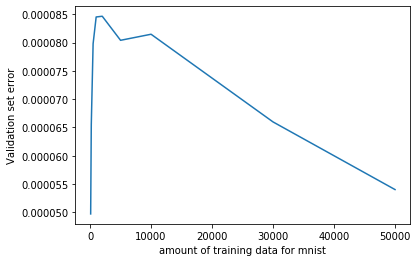

In [265]:
plot_this = []
for i, e in enumerate(QDA_errors_val_total):
    plot_this.append(e / 10000)
plt.plot(sizes, plot_this)
plt.ylabel("Validation set error")
plt.xlabel("amount of training data for mnist")

No handles with labels found to put in legend.


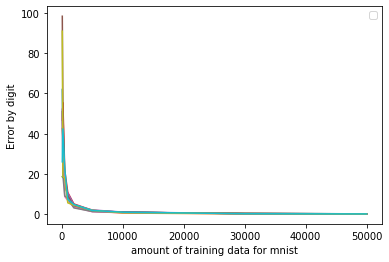

In [266]:
plt.plot(sizes, QDA_errors_val_digit)
plt.ylabel("Error by digit")
plt.xlabel("amount of training data for mnist")
plt.legend()

In [210]:
# run6

data = io.loadmat("data/mnist_data.mat")
mnist = data["training_data"]
mnist = np.concatenate((mnist, data["training_labels"]), axis=1)
np.random.seed(69420)
np.random.shuffle(mnist)

mnist_train_s = mnist[:, :-1]
mnist_train_l = mnist[:, -1:]

normalized = []
for i in range(len(mnist_train_s)):
    point = mnist_train_s[i][:]
    l_2 = np.linalg.norm(point)
    normalized.append(point / l_2)
    
mnist_train_s = normalized

In [217]:
# run7

train_s = mnist_train_s[:]
train_l = mnist_train_l[:]
r = QDA(train_s, train_l)
data = io.loadmat("data/mnist_data.mat")
mnist = data["test_data"]
y_pred = r.pred(mnist)

results_to_csv(np.array(y_pred))

Finished training on sample points!


In [ ]:
# run8

# Separate spam data
data = io.loadmat("data/spam_data.mat")
spam = data["training_data"]
spam = np.concatenate((spam, data["training_labels"]), axis=1)
np.random.shuffle(spam)

spam_train_s = spam[:, :-1]
spam_train_l = spam[:, -1:]
N_spam_train = 5172
N_spam_features = 32

print("spam_training_data:", spam_train_s.shape)
print("spam_training_labels:", spam_train_l.shape)

In [224]:
# Normalize
normalized = []
for i in range(len(spam_train_s)):
    point = spam_train_s[i][:]
    l_2 = np.linalg.norm(point)
    normalized.append(point / l_2)
    
spam_train_s = normalized

In [248]:
class QDA_spam:

    def __init__(self, train, label):
        self.train = train
        self.label = label
        self.N_features = len(self.train[0])
        self.predicted = []
        
        # Partition training points by class
        self.sample_c = [[],[]]
        for i in range(len(train)):
            self.sample_c[self.label[i][0]].append(self.train[i])
        
        # Calculate n_c values
        self.n_c = [0,0]
        for dig in range(0,2):
            self.n_c[dig] = len(self.sample_c[dig])
        
        # Calculate mu_c vectors
        self.mu = np.zeros((2, self.N_features))
        for dig in range(0,2):
            mu_c = self.get_mu_c(dig)
            self.mu[dig] = mu_c
        
        # Calculate cov_c matrices
        self.cov = []
        
        for dig in range(0,2):
            cov_c = self.get_cov_c(dig)
            print(cov_c.shape)
            self.make_invertible(cov_c)
            self.cov.append(cov_c)

        print("Finished training on sample points!")
        
    def get_mu_c(self, dig):
        sum_c = np.zeros(self.N_features)
        for i in range(len(self.sample_c[dig])):
            sum_c = np.add(sum_c, self.sample_c[dig][i])
        return [x / self.n_c[dig] for x in sum_c]
    
    def get_cov_c(self, dig):
        return np.cov(np.transpose(self.sample_c[dig]))
        
    def prior(self, dig):
        return self.n_c[dig] / len(self.train)
    
    def make_invertible(self, cov):
        for i in range(len(cov)):
            for j in range(len(cov[0])):
                cov[i][j] = round(cov[i][j], 8)
        
        for i in range(len(cov)):
            cov[i][i] = cov[i][i] + 1e-9

    def predict(self, dig, X):
        mu_c = self.mu[dig]
        cov_c = self.cov[dig]
        shifted = [np.subtract(row, mu_c) for row in X]
        
        inv = np.linalg.inv(cov_c)
        inv_prod = np.matmul(shifted, inv)
        
        first_term = np.array([np.matmul(shifted[i], inv_prod[i]) for i in range(len(shifted))])
        second_term = np.matmul(mu_c, np.matmul(inv, np.transpose(mu_c)))
        third_term = np.log(self.prior(dig))
        
        return np.add(np.add(-0.5 * first_term, -0.5 * np.linalg.slogdet(cov_c)[1]), np.log(self.prior(dig)))
    
    def choose(self, X, labels, err_or_pred):
        lin_disc_vals = [self.predict(dig, X) for dig in range(0, 2)]
        
        errors = [0,0]
        digits = []
        for j in range(len(lin_disc_vals[0])):
            max_val = lin_disc_vals[0][j]
            max_dig = 0
            for dig in range(1, 2):
                if lin_disc_vals[dig][j] > max_val:
                    max_val = lin_disc_vals[dig][j]
                    max_dig = dig
            digits.append(max_dig)
            if err_or_pred != "pred" and max_dig != labels[j][0]:
                errors[labels[j][0]] = errors[labels[j][0]] + 1
            
        self.predicted = errors
        if err_or_pred == "pred":
            return digits
        
    def pred(self, points):
        return self.choose(points, [], "pred")
    
    def digit_error(self, points, labels, recalc):
        if recalc:
            self.choose(points, labels, "")          
        return [self.predicted[dig] / self.n_c[dig] for dig in range(0,2)]
                           
    def total_error(self, points, labels, recalc):
        if recalc:
            self.choose(points, labels, "")
        return builtins.sum(self.predicted) / len(points)

In [245]:
train_s = spam_train_s[:]
train_l = spam_train_l[:]
train_l = np.array([[int(label[0])] for label in train_l])
r = QDA_spam(train_s, train_l)
data = io.loadmat("data/spam_data.mat")
spam = data["test_data"]
y_pred = r.pred(spam)
results_to_csv(np.array(y_pred))

(32, 32)
(32, 32)
Finished training on sample points!
